# Intérieur et Extérieur d'une fonction

Le but est ici de trouver un réseau de neurones qui distingue deux zones compliquées du plan : la zone
bleue et la zone rouge.

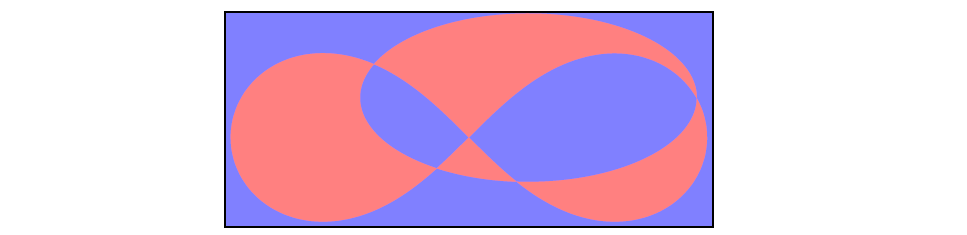

On fusionne 1 lemniscate de Bernoulli (x^2 + y^2)^2 = 4(x^2 − y^2)  et 1 ellipse (x − 12)^2 + 4( y − 13)^2 = 2

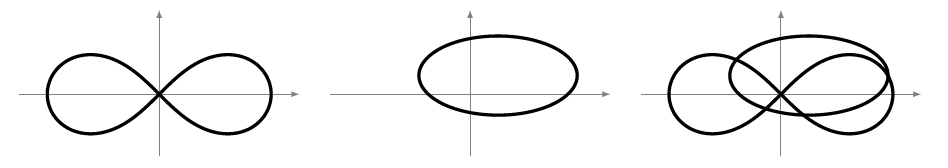

1. f (x, y) = (x^2 + y^2)^2 − 4(x^2 − y^2)·(x − 12 )2 + 4( y − 13 )^2 − 2= 0
2. la zone rouge correspond aux points de coordonnées (x, y) pour lesquels f (x, y) ⩽ 0 et la zone bleue à f (x, y) > 0
3. nous allons limiter notre étude à une zone rectangulaire
4. le rectangle est choisi de sorte que l’aire bleue et l’aire rouge soient à peu près égales

**Objectifs :**
1. on oublie maintenant la fonction f et on ne retient que quelques points rouges et quelques points bleus
2. on cherche un réseau et une fonction F telle que F(x, y) ≃ 1 pour les points rouges et F(x, y) ≃ 0 pour les points bleus

**Données :**
1. on divise notre rectangle en une grille de n×n points
2. les exemples ci-dessous sont calculés pour n = 200
3. nous avons donc 40 000 points (x, y), repartis (à peu près) équitablement entre rouge (z = 1) et bleu (z = 0)

**Architecture :**
1. on décide de concevoir un réseau à 4 couches, avec le même nombre p de neurones par couche pour les trois premières couches et un seul neurone sur la couche de sortie
2. la fonction d’activation choisie pour tous les neurones est ReLU
3. voici une illustration de la configuration pour p = 3

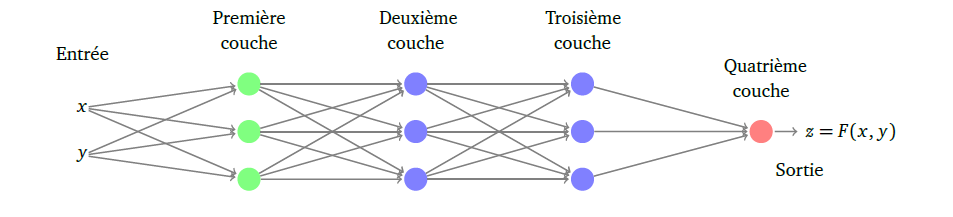

## 1. modules à charger

In [ ]:
import numpy as np
from tensorflow import keras
# from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

## 2. Données

In [ ]:
n = 200  # pour le nb de points dans la grille
xmin, xmax, ymin, ymax = -2.05, 2.05, -0.75, 1.05

# Fonction f : lemniscate de Bernouilli + ellipse
def f(x,y):
    res = ...
    return  res


# Generations des points rouges/bleus
# Rouge si f <= 0, bleu sinon
def donnees(n):
    VX = np.linspace(xmin, xmax, n)
    VY = np.linspace(ymin, ymax, n)
    X, Y = np.meshgrid(VX, VY)
    Z = f(X, Y)
    Zbool = (Z ... 0)
    Zint = Zbool.astype(np.int)
    return X, Y, Zint


# Test
X, Y, Z = donnees(n)
# print(X,Y,Z)
plus = np.sum(Z)
moins = np.size(Z)-plus
print("Points positifs :",plus)
print("Points négatifs :",moins)


def donnees_keras(n):
    X, Y, Z = donnees(n)
    X = X.flatten()
    Y = Y.flatten()

    # Z = Z.flatten()
    liste_points = []
    for i in range(n**2):
        points = (X[i], Y[i])
        liste_points.append(points)

    entree = np.array(liste_points)
    # print(entree)
    print(entree.shape)

    sortie = Z.reshape((n**2,1))

    # print(sortie)
    print(sortie.shape)
    return entree, sortie

# Test
donnees_keras(n)

# Affichage
def graphique_donnees(X,Y,Z):

    # for x, y in carres_rouges:    # points
    #     plt.scatter(x, y, marker='s', color='red')
    # for x, y in ronds_bleus:    # points
    #     plt.scatter(x, y, color='blue')

    plt.scatter(X, Y, c=Z, s=2, cmap='bwr')

    plt.axis('equal')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.tight_layout()
    # plt.savefig('retro_05_p=5.png')
    plt.show()
    return

# Test
# graphique_donnees(X,Y,Z)




Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## 3. Réseau

In [ ]:
modele = Sequential()

p = 5
q = p
r = p

# 2 entrées (x,y),
# première couche dense avec activation relu : p neurones
# deuxième couche dense  avec activation relu : q neurones
# troisième couche dense  avec activation relu : r neurones
# quatrième couche (sortie) dense  avec activation relu : 1 neurone
# activation = à voir

# Première couche : p neurones (entrée de dimension 2)
modele.add(...)

# Deuxième couche : q neurones
modele.add(...)

# Troisième couche : r neurones
modele.add(...)

# Couche de sortie : 1 neurone
modele.add(...)

# Descente de gradient
# mysgd = optimizers.SGD(lr=0.1)
# modele.compile(loss='mean_squared_error', optimizer=adam)
modele.compile(...)

# Données
X_train, Y_train = donnees_keras(n)

# Calcul des poids
# modele.fit -> epochs=10, batch_size=100, verbose=1
modele.fit(...)

print(modele.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

## 4. Résultats

In [ ]:
### Partie C - Résultats

Zpredict = modele.predict(X_train)
Zpredict = Zpredict.reshape((n,n))
Zbool = Zpredict >= 0.5
Zint = Zbool.astype(np.int)
# print(Z)
# print(Zpredict)
graphique_donnees(X, Y, Zint)

Epoch 1/10


<ipython-input-8-1eaf290ac9fc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = modele.fit_generator(training_set,


625/625 [==============================] - 72s 98ms/step - loss: 0.6730 - accuracy: 0.5669
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5827 - accuracy: 0.6892
Epoch 3/10
625/625 [==============================] - 60s 96ms/step - loss: 0.5465 - accuracy: 0.7215
Epoch 4/10
625/625 [==============================] - 62s 99ms/step - loss: 0.5175 - accuracy: 0.7401
Epoch 5/10
625/625 [==============================] - 61s 98ms/step - loss: 0.5028 - accuracy: 0.7524
Epoch 6/10
625/625 [==============================] - 61s 98ms/step - loss: 0.4827 - accuracy: 0.7624
Epoch 7/10
625/625 [==============================] - 62s 99ms/step - loss: 0.4657 - accuracy: 0.7795
Epoch 8/10
625/625 [==============================] - 62s 98ms/step - loss: 0.4479 - accuracy: 0.7891
Epoch 9/10
625/625 [==============================] - 59s 95ms/step - loss: 0.4393 - accuracy: 0.7901
Epoch 10/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4319 - accura

Si tout va bien voici ce que vous devriez trouver :

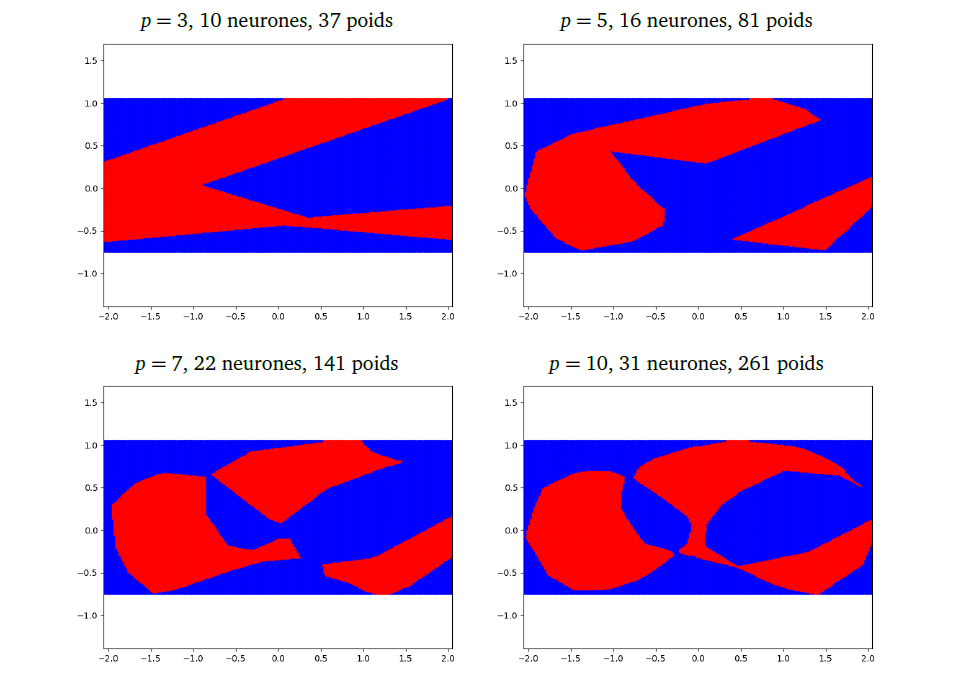

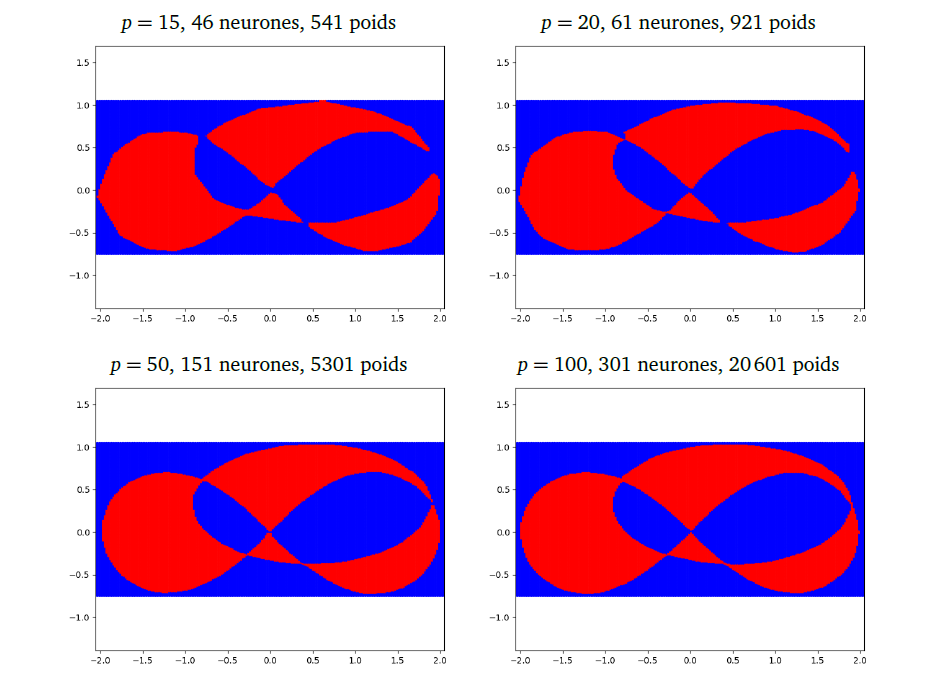